## LDA Example
### Using COVID-19 dataset sample - first 300 news articles
https://aylien.com/blog/free-coronavirus-news-dataset

### Import Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_colwidth', None)

covid_df = pd.read_csv('data/covid_df_tester.csv', sep='\t')

In [2]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   source_id      300 non-null    int64 
 1   source_domain  300 non-null    object
 2   author_id      300 non-null    int64 
 3   author_name    252 non-null    object
 4   title          300 non-null    object
 5   body           300 non-null    object
dtypes: int64(2), object(4)
memory usage: 14.2+ KB


In [3]:
covid_df.head()

,source_id,source_domain,author_id,author_name,title,body
0,1737,Complex,973106,Gavin Evans,British Prime Minister Boris Johnson Hospitalized 10 Days After COVID-19 Diagnosis,"On Sunday, British Prime Minister Boris Johnson was hospitalized ""for tests"" because of ""persistent"" COVID-19 symptoms 10 days after he tested positive, CNN reports. \nJohnson reportedly went to the unspecified London hospital after his doctor advised him to do so. A press release from his office called the move ""precautionary."" \nOn March 26, Johnson revealed he had tested positive and that he had been dealing with symptoms since that date. Britain had gone into lockdown two days earlier.\nSince the 26th, Johnson has been quarantined at his Downing Street residence. He is the first known world leader to have contracted the virus. \nRoughly a month ago, right around the time the U.K. started dealing with an outbreak, Johnson garnered media coverage for saying he'd shook hands with coronavirus patients during a hospital visit. \n""I shook hands with everybody, you will be pleased to know, and I continue to shake hands,"" Johnson said during a press conference that took place on March 3. His positive test was registered 23 days later. \nOn Saturday, Johnson's fiancée, Carrie Symonds, tweeted out that she'd spent a week in bed with coronavirus symptoms. She had not officially been tested for the disease, but said she felt ""stronger"" and ""on the mend"" following the week of rest:"
1,433,SBS,940858,Australia,NSW coronavirus death toll hits 18 as cases rise to 2637,"NSW has now recorded 18 COVID-19 deaths as the state's total number of cases rises to 2637.\n\nNSW Health said on Monday the state had recorded 57 new cases - a drop on the previous day which was partly explained by fewer tests being done over the weekend.\n\nThe death toll rose to 18 after the deaths of an 86-year-old man and an 85-year-old man on Sunday.\n\nIt comes after NSW Police Commissioner Mick Fuller on Sunday announced an investigation into the circumstances surrounding the docking and disembarkation of passengers from the ill-fated Ruby Princess cruise ship.\n\nThe investigation - led by the NSW police homicide squad - aims to identify how passengers were allowed to disembark from the ship in Sydney, which is linked to 622 COVID-19 cases and at least 11 deaths across the country.\n\n""The only way I can get to the bottom of whether our national biosecurity laws and our state laws were broken is through a criminal investigation,"" Mr Fuller said.\n\nMr Fuller told reporters transparency regarding patient health on board the cruise ship was a key question for the investigation.\n\nThe ship will dock in Port Kembla, near Wollongong on Monday.\n\nIt's expected to spend up to 10 days docked for medical assessments, treatment or emergency extractions of the crew, NSW Police say.\n\nThe investigation will cover the actions of the port authority, ambulance, police, the NSW Health department and Carnival Australia.\n\nThe NSW government on Sunday urged young people to take the COVID-19 pandemic seriously, revealing more than a quarter of the state's current coronavirus cases are in people aged under 29."
2,460,Hindustan Times,941178,Ht Correspondent,"Industry in Chandigarh will need major impetus by government post lockdown, say businessmen","ChandigarhWith shops and manufacturing units closed due to the curfew imposed to stop the spread of coronavirus disease (Covid-19), traders fear economic recovery will be difficult.It is for the first time that all business activity, trading and manufacturing, has been shut down in the city.“There is great uncertainty among businessmen as to what the future holds. People have even stopped planning how to manage the after-effects of the shutdown. We also don’t know for how long businesses will remain disturbed because of the Covid-19 pandemic,” said Neeraj Bajaj of the Chandigarh Business Council.In the city’s industrial area, more than 30,000 are em

### Split Data and Create LDA Object

In [4]:
from LDA import LDAClassification
from sklearn.model_selection import train_test_split

# Grab body text and convert to list
covid_df_list = covid_df['body'].values.tolist()

# Train Test Split
covid_df_train, covid_df_test = train_test_split(covid_df_list, test_size=0.3, random_state=42, shuffle=True)

# Build model
# Exclude common words to produce some variety in topics
lda_c = LDAClassification(stop_words_extend=['coronavirus', 'covid 19', 'covid-19', 'covid'])

### Find optimal topics

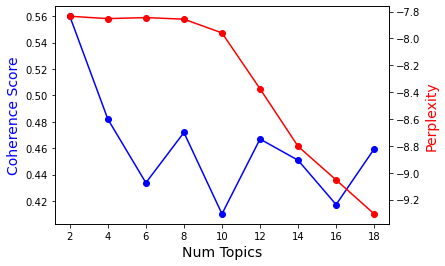

In [5]:
import matplotlib.pyplot as plt

# Try up to 20 topics
limit=20; start=2; step=2;

# Can take a long time to run.
model_list, perplexity_values, coherence_values = lda_c.train_find_optimal_topics(text_list=covid_df_train, start=start, limit=limit, step=step)

# Show graph
x = range(start, limit, step)

# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(x, coherence_values, color="blue", marker="o")
# set x-axis label
ax.set_xlabel("Num Topics",fontsize=14)
# set y-axis label
ax.set_ylabel("Coherence Score",color="blue",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(x, perplexity_values,color="red",marker="o")
ax2.set_ylabel("Perplexity",color="red",fontsize=14)
plt.show()

### Predict

In [6]:
# Train with optimal topics
lda_c.train(covid_df_train, num_topics=8)

# Predict with FULL set
df_dominant_topic, df_topic_distributions = lda_c.predict(covid_df_list)

Perplexity:  -7.85632162344386
Coherence Score:  0.4718676259818084


In [7]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3,0.9946,"say, people, indigenous, go, case, health, death, also, take, many","[british_prime, hospitalize, test, persistent_symptom, day, tested_positive, report, reportedly, go, unspecified, hospital, doctor, advise, press, release, office, call, move, precautionary, reveal, tested_positive, deal, symptom, go, lockdown, day, early, quarantine, residence, first, know, world, leader, contract, virus, roughly, month, ago, right, time, start, deal, outbreak, garner, medium, coverage, say, shake, hand, patient, hospital, visit, shake, hand, please, know, continue, shake, hand, say, press, conference, take, place, positive, test, register, day, later, fiancee, carrie_symond, tweet, spend, week, bed, symptom, officially, test, disease, say, feel, strong, mend, follow, week, rest]"
1,1,3,0.9069,"say, people, indigenous, go, case, health, death, also, take, many","[record, death, state, total, number, case, rise, health, say, state, record, new, case, drop, previous, day, partly, explain, few, test, do, weekend, death_toll, rise, death, man, man, come, police, announce, investigation, circumstance, surround, docking, disembarkation, passenger, ill, fate, ruby_princess, cruise_ship, investigation, lead, aim, identify, passenger, allow, disembark, ship, link, case, least, death, country, way, get, bottom, national, biosecurity, law, state, law, break, criminal, investigation, say, full, told_reporter, transparency, regard, patient, health, board, cruise_ship, key, question, investigation, ship, dock, port, kembla, expect, spend, day, dock, medical, assessment, treatment, emergency, extraction, crew, police, say, investigation, cover, action, port, authority, ambulance, urge, young, ...]"
2,2,3,0.5258,"say, people, indigenous, go, case, health, death, also, take, many","[chandigarhwith, shop, manufacturing, unit, close, due, curfew, impose, stop, spread, disease, trader, fear, economic, recovery, difficult, first, time, business, activity, trading, manufacturing, shut, city, great, uncertainty, businessman, future, hold, people, even, stop, plan, manage, effect, shutdown, also, know, long, business, remain, disturbed, pandemic, say, industrial, area, employ, manufacturing, service, unit, short, term, struggle, industry, need, major, impetus, government, short, moratorium, period, extension, month, payment, liability, include, utility, bill, taxis, duty, government, say, also, seek, loan, account, become, non, perform, asset, npa, lockdown, consider, wilful, defaulter, stimulus, package, msme, micro, small, medium, enterprise, consider, financial, year, financial, support, unorganized, sector, also, ...]"
3,3,3,0.8975,"say, people, indigenous, go, case, health, death, also, take, many","[chandigarh, man, discharge, isolation, ward, government, medical, college, hospital, gmch, sector, two_week, treatment, elate, home, feel, perfectly, fine, said, arrive, house, sector, pm, son, senior, official, youth, tested_positive, march, come, contact, brother, first, patient, woman, sector, one, careful, severe, symptom, even, young, immune, advisory, social_distance, hand, washing, follow, religiously, say, course, stay, hospital, learn, afraid, need, careful, morale, high, confident, quick, recovery, say, add, affected, disease, lose, hope, recovery, possible, youth, report, hospital, fever, rise, alert, infect, isolation, allow, move, spend, day, read, talk, friend, doctor, nurse, support, staff, immensely, helpful, say, brother, city, first, positive, patient, also, discharge, come, ...]"
4,4,3,0.9385,"say, people, indigenous, go, case, health, death, also, take, many","[chandigarh, stillness, become, much, part, tricity, last, two_week, shatter, explode, firecracker, night, people, enthusiasm, follow, prime_minister, solemn, call, candlelight, vigil, unite, fight, epidemic, exceed, brief, keep, thing, low, key, even, resident, follow, pm, show, solidarity, battle, pandemic, switc

In [8]:
df_topic_distributions

,Topic,Keywords,Num_Documents,Perc_Documents
0,0.0,"drone, mask, perform, inmate, federal_government, zoom, ventilator, meeting, federal, prison",6.0,0.0200
1,2.0,"overdraft, interest, bank, rate, pay, law, image_caption, say, image_copyright, new",NaN,NaN
2,3.0,"say, people, indigenous, go, case, health, death, also, take, many",9.0,0.0300
3,4.0,"say, home, family, delivery, get, go, other, well, stay, year",239.0,0.7967
4,5.0,"customer, box, basic, vulnerable, supermarket, priority, help, include, essential, need",25.0,0.0833
5,6.0,"church, funeral, county, palm_sunday, cat, order, tiger, moment, zoo, notification",5.0,0.0167
6,7.0,"hedge_fund, stock, market, position, also, fund, group, bullish, end, investor",1.0,0.0033
7,NaN,NaN,15.0,0.0500
